# Task 4
Implementate un programma che, data una cartella di immagini e dati l’identificatore ID di una immagine, e un valore “k”, restituisca e visualizzi le k immagini piu’ simili a quella di identificatore ID sulla base di tutti i corrispondenti descrittori visuali.
Per ciascuna immagine restituita, restituire anche il matching score globale, oltre al contributo allo stesso da parte dei singoli modelli visuali utilizzati.

In [67]:
from ipynb.fs.full.task1_new import *
from ipynb.fs.full.task2 import *
from ipynb.fs.full.task3 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [68]:
HOGdescriptor = dictionaryOfHOGDescriptors
LBPdescriptor = dictionaryOfLBPDescriptors
colorMomentsdescriptor = dictionaryOfColorMomentsDescriptors

### Implementazione che calcola la distanza tra l'immagine in input e tutte le altre della cartella sulla base di tutti e 3 i decrittori implementati e restituisce un descrittore unico

- Il descrittore unico restituito dell'immagine Y è un vettore formato da 3 elementi:
    - distanza tra l'immagine in input e l'immagine Y secondo i color moments
    - distanza tra l'immagine in input e l'immagine Y secondo i le features LBP
    - distanza tra l'immagine in input e l'immagine Y secondo le HOG features

In [69]:
def calculateDistanceFromOtherImages(imageID):
    
    # ------------------------------------------------------------------------------------------------------------------------------------

    # COLOR MOMENTS

    colorMomentsOfInputImage = colorMomentsdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    dictionaryOfDistancesColorMoments = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando i Color Moments
    for (key, v) in sorted(colorMomentsdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesColorMoments[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------

    # HOG FEATURES
    
    HOGOfInputImage = HOGdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(HOGOfInputImage)

    dictionaryOfDistancesHOG = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando le HOG features
    for (key, v) in sorted(HOGdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesHOG[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------
    
    # LBP FEATURES
    
    LBPOfInputImage = LBPdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    #numpyArr = np.array(LBPOfInputImage)

    dictionaryOfDistancesLBP = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando il descrittore LBP
    for (key, v) in sorted(LBPdescriptor.items()):
        #numpyArrOfV = np.array(v)
        dist = np.linalg.norm(LBPOfInputImage - v)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesLBP[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # creo un dizionario chiave valore:
    # 'image-11' : [3.5, 0, 9] indica che l'immagine in input dista 3.5 secondo i color moments, 0 per lbp e 9 per HOG dall'immagine in input
    dictionaryOfDistancesFromInputImage = {}

    for i in range(0, len(dir_list)):
        # TODO: sistemare il calcolo della distanza su LPB: dictionaryOfDistancesLBP[dir_list[i]]
        distance = [dictionaryOfDistancesColorMoments[dir_list[i]], dictionaryOfDistancesLBP[dir_list[i]], dictionaryOfDistancesHOG[dir_list[i]]]
        dictionaryOfDistancesFromInputImage[dir_list[i]] = distance

    #print(dictionaryOfDistancesFromInputImage)
    #print(dictionaryOfDistancesLBP)

    return dictionaryOfDistancesFromInputImage

In [70]:
dictionaryOfDistancesFromImage = calculateDistanceFromOtherImages('image-0.png')

### Implementazione di una funzione che restituisce le K immagini più simili a quella in input tenendo in considerazione tutti e 3 i descrittori implementati

In [71]:
def calculateKsimilarImages(imageID, k):
    vectorOfDistancesOfInputImage = dictionaryOfDistancesFromImage[imageID]
    numpyArr = np.array(vectorOfDistancesOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfDistancesFromImage.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistances[key] = dist

    print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [72]:
kSimilarImages = calculateKsimilarImages('image-0.png', 20)

{'image-0.png': 0.0, 'image-1.png': 12.710227288459091, 'image-10.png': 41.19365542368216, 'image-100.png': 19.64476152303813, 'image-101.png': 25.47937461457044, 'image-102.png': 20.330650462765163, 'image-103.png': 22.813965072981862, 'image-104.png': 21.96984206633752, 'image-105.png': 17.440945949216278, 'image-106.png': 14.157391389438011, 'image-107.png': 21.9614863712238, 'image-108.png': 19.67788231246314, 'image-109.png': 18.969742777427964, 'image-11.png': 34.16400964645221, 'image-110.png': 9.57673998033239, 'image-111.png': 29.556480955585805, 'image-112.png': 34.12776163544639, 'image-113.png': 22.851903211100502, 'image-114.png': 28.77942870858629, 'image-115.png': 9.416746242987035, 'image-116.png': 28.647672334658363, 'image-117.png': 11.534877028463718, 'image-118.png': 10.159695624392576, 'image-119.png': 11.296264628104428, 'image-12.png': 40.83346214987464, 'image-120.png': 34.605280616689086, 'image-121.png': 27.4146708534221, 'image-122.png': 25.100435966604593, '

5
{'image-0.png': 0.0, 'image-1.png': 12.710227288459091, 'image-10.png': 41.19365542368216, 'image-100.png': 19.64476152303813, 'image-101.png': 25.47937461457044, 'image-102.png': 20.330650462765163, 'image-103.png': 22.813965072981862, 'image-104.png': 21.96984206633752, 'image-105.png': 17.440945949216278, 'image-106.png': 14.157391389438011, 'image-107.png': 21.9614863712238, 'image-108.png': 19.67788231246314, 'image-109.png': 18.969742777427964, 'image-11.png': 34.16400964645221, 'image-110.png': 9.57673998033239, 'image-111.png': 29.556480955585805, 'image-112.png': 34.12776163544639, 'image-113.png': 22.851903211100502, 'image-114.png': 28.77942870858629, 'image-115.png': 9.416746242987035, 'image-116.png': 28.647672334658363, 'image-117.png': 11.534877028463718, 'image-118.png': 10.159695624392576, 'image-119.png': 11.296264628104428, 'image-12.png': 40.83346214987464, 'image-120.png': 34.605280616689086, 'image-121.png': 27.4146708534221, 'image-122.png': 25.100435966604593,

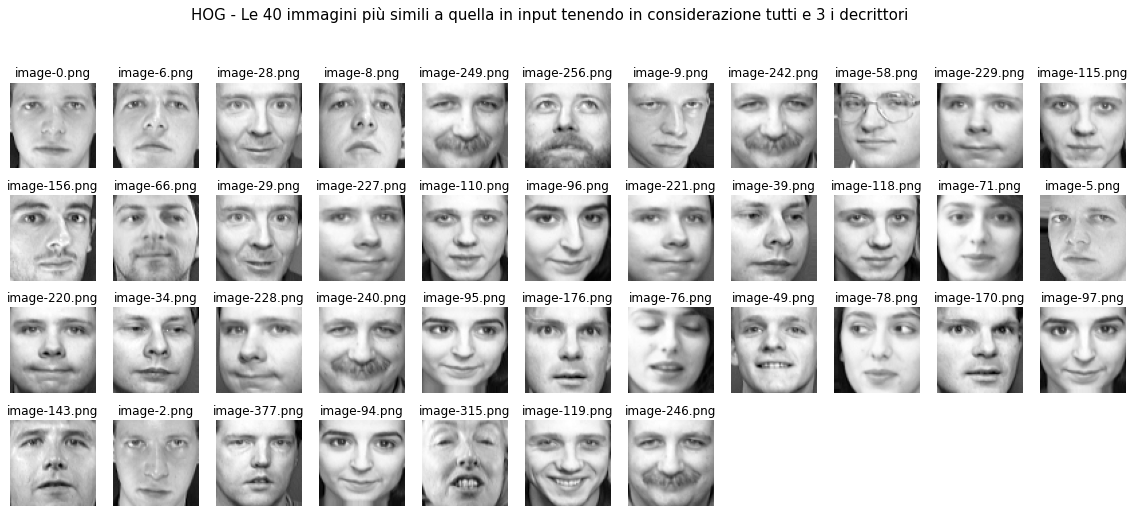

In [73]:
import math
# numero di immagini simili che vogliamo ottenere
k = 40

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)

fig = plt.figure(figsize=(20, 10))
fig.suptitle('HOG - ' + 'Le ' + str(k) + ' immagini più simili a quella in input tenendo in considerazione tutti e 3 i decrittori', fontsize=15)
# plt.axis('off')
currentIndex = 1

kSimilarImagesOfColMom = calculateKsimilarImages('image-0.png', k)
#print(kSimilarImagesOfColMom)

for j in range(len(kSimilarImagesOfColMom)):
    imageName = kSimilarImagesOfColMom[j][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(imageName)

    currentIndex += 1

plt.show()

In [74]:
# for i in range(0, len(kSimilarImages)):
#     imageName = kSimilarImages[i][0]
#     print("Nome dell'immagine: ", kSimilarImages[i][0])
#     print("Vettore delle distanze dall'immagine: ", dictionaryOfDistancesFromImage[imageName])
#     print("Distanza dall'immagine in input: ", kSimilarImages[i][1])

#     # load the image
#     image = Image.open('./olivetti_PNG_master/images/' + imageName)
#     # convert image to numpy array
#     # data = asarray(image)

#     # display the array of pixels as an image
#     # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
#     pyplot.imshow(image, cmap='gray')
#     pyplot.show()